In [1]:
import pandas as pd 
import numpy as np

import os
import matplotlib.pyplot as plt

from tqdm import tqdm

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
def read_table(table_path, file=""):
        df = pd.read_excel(table_path, skiprows=28)
        df = df.iloc[: , 8:]
        df.drop(df.tail(49).index,
                inplace = True)

        df = df.set_index('INCOME STATEMENT').transpose()
        cols_to_drop = ['BALANCE SHEET', 'CASH FLOW STATEMENT', 'CHANGES TO SHAREHOLDER EQUITY', 'Ratios']
        df.drop(cols_to_drop, axis=1, inplace=True)
        df['Company_name'] = file
        return df

In [3]:
train_dir = 'data/oil_gas_train/'

df = pd.concat([read_table(os.path.join(train_dir, file), file) for file in tqdm(os.listdir(train_dir))])

company_names = df['Company_name'].copy()
df.columns = ['{}_{}'.format(col, i) for i, col in enumerate(df.columns)]
df.index.names = ['Date']
df = df[df.columns[df.nunique(dropna=False) > 1]]
df = df.apply(pd.to_numeric, errors='coerce')
df.iloc[:, -1] = company_names
df.shape

100%|██████████| 54/54 [00:07<00:00,  7.32it/s]


(2056, 282)

In [4]:
df

,Revenue_0,Consensus:_1,% Surprise | % Est. vs Consensus_2,Revenue Growth (YoY)_3,Cost of Revenue_4,Gross Profit_5,Gross margin_6,Other Operating Income_7,Operating Expenses_8,"Selling, General & Admin_9",Depreciation & Amortization_11,Prov. For Doubful Accounts_12,Other Operating Expenses_13,Operating Income_14,Operating Margin_15,Non-Operating Income (Loss)_16,"Interest Expense, Net_17",Interest Expense_18,Interest Income_19,Foreign Exch Gain (Loss)_21,Income (Loss) from Affiliates (Pre Tax)_22,Other Non-Op Income (Loss)_23,Pretax Income_24,Consensus:_25,% Surprise | % Est. vs Consensus_26,...,Dividends_297,Net Share Repurchases_298,Other_299,Ending Equity_300,Beginning Shs Out_302,Shares Repurchased_303,Avg. Price per share_304,Shares Issued_305,Ending Shs Out_307,Share Repurchase amount_311,Net Shares Repurchased_312,EBITDAR_316,EBITDAR (8x Rental Expense)_317,EBITDA Margin_318,EBITDA / Interest_319,EBITDA - CAPEX / Interest_320,CAPEX / REVENUE_321,CAPEX / EBITDA_322,FCF / DEBT_323,Gross Leverage (Total Debt / EBITDA)_324,Net Leverage (Net Debt / EBITDA)_325,Total Liabilities / Tangible Assets_326,Cash + AR / Total Assets_327,Cash % of Revenue_328,Company_name_329
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-03-31,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0,0.0,0.000,0.000000,0.0,0.0,...,0.000,0.000,-255.879008,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMPY.xlsx
2011-06-30,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0,0.0,0.000,0.000000,0.0,0.0,...,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMPY.xlsx
2011-09-30,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0,0.0,0.000,0.000000,0.0,0.0,...,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMPY.xlsx
2011-12-31,61.863000,0.0,0.0,NaN,-36.854000,25.009000,0.404264,0.0,-57.298,-53.396,0.000000,0.0,-3.902,-32.289,0.000000,-1.351,-1.351,-1.359,0.008,0,0.0,0.000,-33.640000,0.0,0.0,...,0.000,2.700,266.145016,285.502016,0.000000,0.0,0.0,0.000000,0.000000,0.0,NaN,-2.230,-2.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMPY.xlsx
2012-03-31,48.410000,0.0,0.0,NaN,-34.628000,13.782000,0.284693,0.0,-11.440,-6.064,0.000000,0.0,-5.376,2.342,0.048378,-1.683,-1.683,-1.690,0.007,0,0.0,0.000,0.659000,0.0,0.0,...,0.000,40.000,-51.807908,267.995008,0.000000,0.0,0.0,66.420332,66.420332,0.0,-66.420332,30.369,30.369,0.627329,18.044563,-25.013072,1.496922,2.386183,-0.162479,2.078175,1.996800,0.610817,0.045053,0.044009,AMPY.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30,236.260000,0.0,0.0,-0.201414,-172.410000,63.850000,0.270253,0.0,-44.027,-30.740,0.000000,0.0,-13.287,19.823,0.083903,-17.707,-18.558,-18.558,0.000,0,0.0,0.851,2.116000,0.0,0.0,...,-2.722,-84.284,18.936984,1913.910080,164.112272,0.0,0.0,-21.576304,142.535968,0.0,21.576304,73.230,133.276,0.273648,3.483781,-8.725456,0.959024,3.504594,-0.089272,2.653758,2.593956,0.549938,0.037052,0.032541,¦Ъ¦-¦¬¦¦¦-8.xlsx
2019-09-30,176.942000,0.0,0.0,-0.452478,-154.608000,22.334000,0.126222,0.0,-40.690,-27.445,0.000000,0.0,-13.245,-18.356,-0.103740,-5.786,-23.224,-23.224,0.000,0,0.0,17.438,-24.142000,0.0,0.0,...,-2.721,75.253,30.811792,2045.401872,142.535968,0.0,0.0,-4.462848,138.073120,0.0,4.462848,116.568,188.416,0.600784,4.577334,0.129823,0.583745,0.971638,0.020965,3.434923,3.315563,0.538196,0.041221,0.060308,¦Ъ¦-¦¬¦¦¦-8.xlsx
2019-12-31,230.844000,0.0,0.0,-0.259581,-246.974000,-16.130000,-0.069874,0.0,-71.

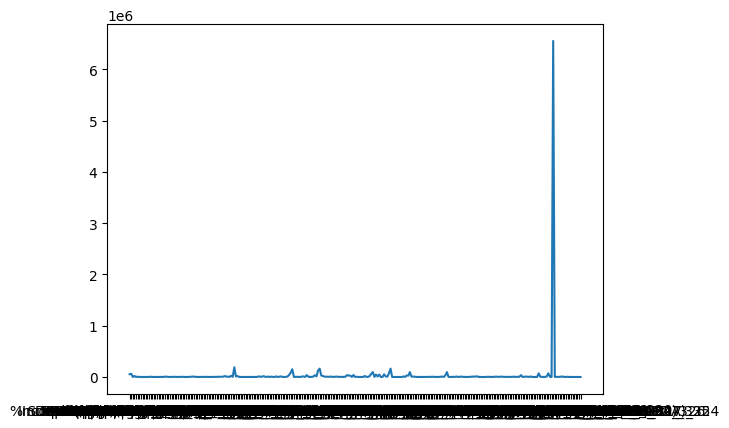

In [5]:
plt.plot(df.drop(['Company_name_329'], axis=1).max())

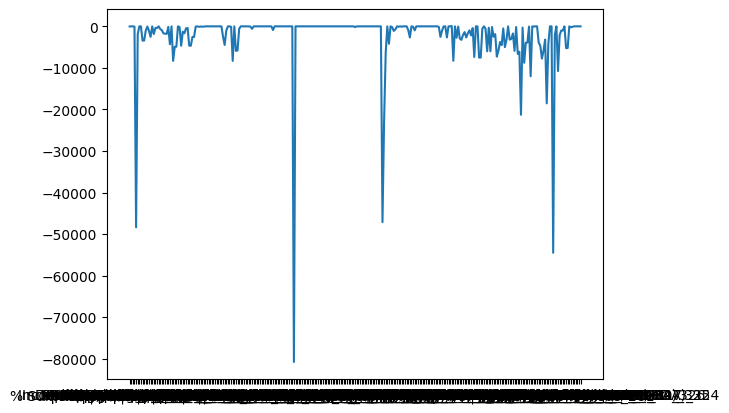

In [6]:
plt.plot(df.drop(['Company_name_329'], axis=1).min())

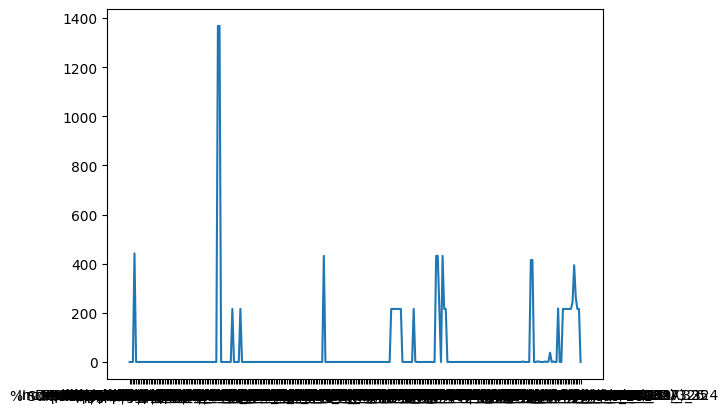

In [7]:
plt.plot(df.isna().sum())

In [8]:
df.isna().sum().sum()

11442

C:\Users\igorl\AppData\Local\Temp\ipykernel_14660\3467317647.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.plot(df.quantile(.50))


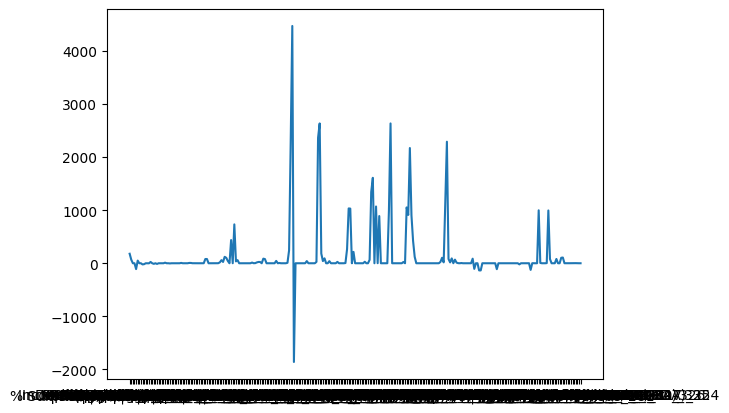

In [9]:
plt.plot(df.quantile(.50))

C:\Users\igorl\AppData\Local\Temp\ipykernel_14660\2629085324.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.plot(df.mean())


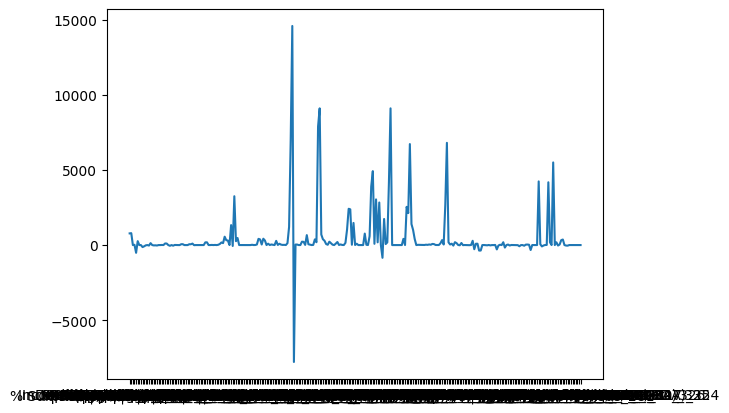

In [10]:
plt.plot(df.mean())

C:\Users\igorl\AppData\Local\Temp\ipykernel_14660\213549033.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.plot(df.mean() - df.mean(axis = 0, skipna = False))


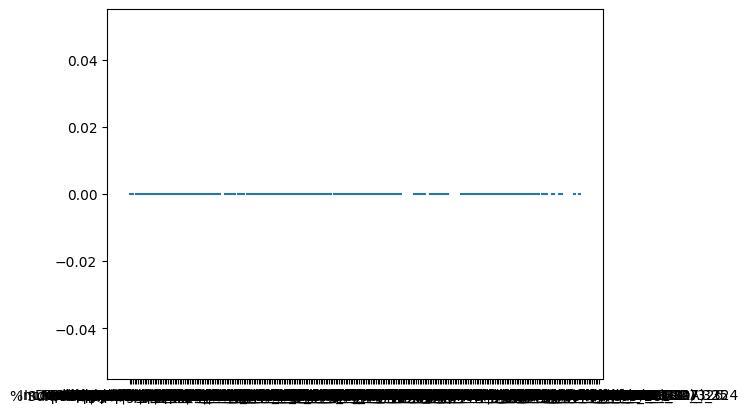

In [11]:
plt.plot(df.mean() - df.mean(axis = 0, skipna = False))

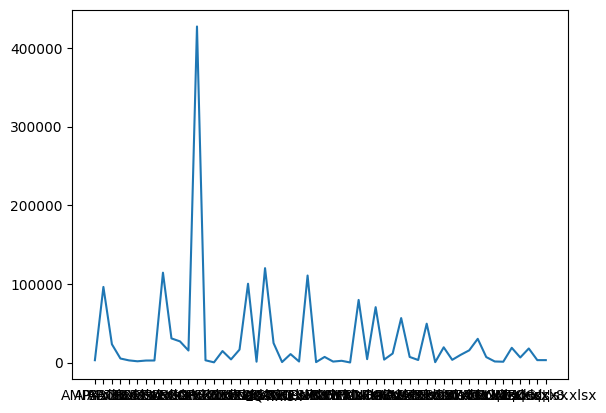

In [12]:
plt.plot(df.groupby(['Company_name_329'])['Revenue_0'].sum())

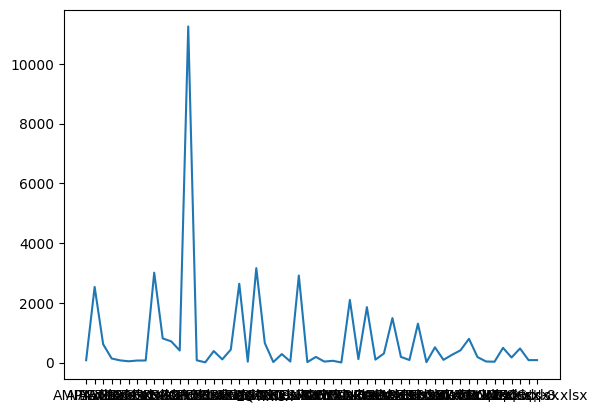

In [13]:
plt.plot(df.groupby(['Company_name_329'])['Revenue_0'].mean())